Problem Statement - 1: Student Marks and Grades Summary 


===== Student Summary =====

Name: Steve Rodriguez
  Marks: [55.07, 72.56, 96.74]
  Total: 224.37
  Average: 74.79
  Grade: C

Name: Duke Jones
  Marks: [92.18, 70.76, 99.43]
  Total: 262.37
  Average: 87.46
  Grade: B

Name: Paul Wilson
  Marks: [95.92, 80.54, 99.47]
  Total: 275.93
  Average: 91.98
  Grade: A

Name: Ben Brown
  Marks: [85.31, 93.46, 64.08]
  Total: 242.85
  Average: 80.95
  Grade: B

Name: Hank Williams
  Marks: [71.7, 84.51, 70.41]
  Total: 226.62
  Average: 75.54
  Grade: C

Name: Steve Jones
  Marks: [52.91, 53.59, 93.38]
  Total: 199.88
  Average: 66.63
  Grade: D

Name: Charlie Brown
  Marks: [61.46, 67.02, 90.9]
  Total: 219.38
  Average: 73.13
  Grade: C

Name: Ben Johnson
  Marks: [82.6, 62.13, 61.67]
  Total: 206.40
  Average: 68.80
  Grade: D

Name: Eve Brown
  Marks: [94.14, 55.54, 75.59]
  Total: 225.27
  Average: 75.09
  Grade: C

Name: Alice Davis
  Marks: [93.93, 64.27, 93.7]
  Total: 251.90
  Average: 83.97
  Grade: B

Name: David Smith
  Marks: [75.

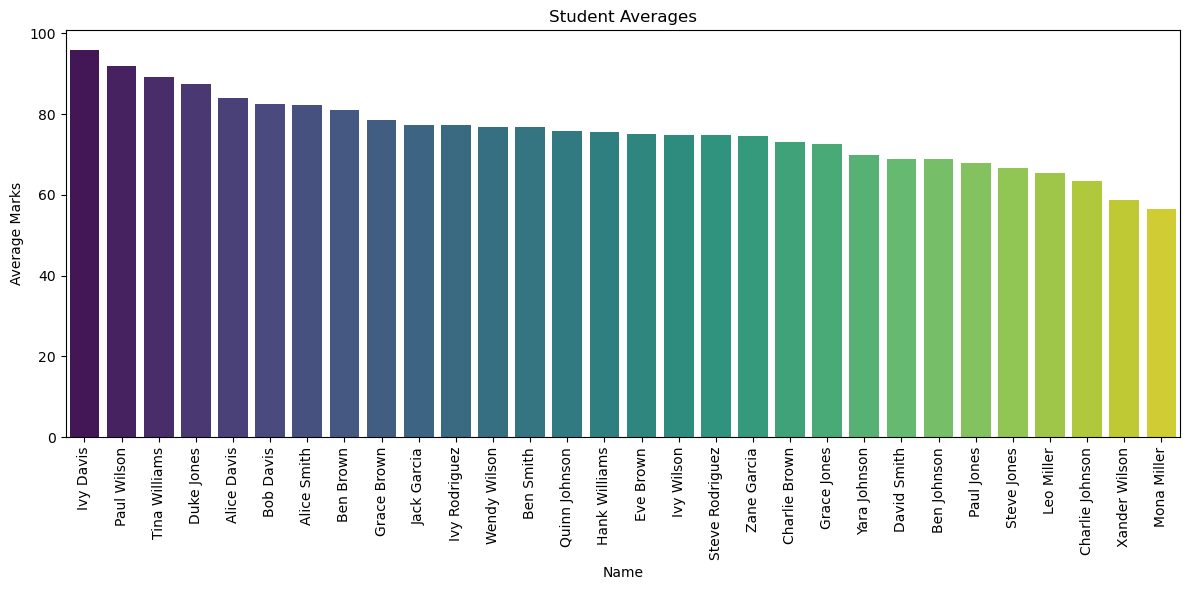


✅ Project completed. Cleaned data and visualizations saved.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(filepath):
    """Load messy CSV and clean data types, formatting, nulls."""
    df = pd.read_csv(filepath)

    # Clean name: strip whitespace, fix case
    df['name'] = df['name'].str.strip().str.title()

    # Convert marks to float and handle errors
    for subject in ['subject1', 'subject2', 'subject3']:
        df[subject] = pd.to_numeric(df[subject], errors='coerce')  # converts bad data to NaN
        df[subject].fillna(df[subject].mean(), inplace=True)       # fill NaNs with subject mean

    return df

def assign_grade(avg):
    """Assign grade based on average score."""
    if avg >= 90:
        return 'A'
    elif avg >= 80:
        return 'B'
    elif avg >= 70:
        return 'C'
    elif avg >= 60:
        return 'D'
    else:
        return 'F'

def process_data(df):
    """Calculate total, average, and assign grades."""
    df['total'] = df[['subject1', 'subject2', 'subject3']].sum(axis=1)
    df['average'] = df['total'] / 3
    df['grade'] = df['average'].apply(assign_grade)
    return df

def print_summary(df):
    """Print each student's result and class summary."""
    print("\n===== Student Summary =====")
    for _, row in df.iterrows():
        print(f"\nName: {row['name']}")
        print(f"  Marks: {row[['subject1', 'subject2', 'subject3']].tolist()}")
        print(f"  Total: {row['total']:.2f}")
        print(f"  Average: {row['average']:.2f}")
        print(f"  Grade: {row['grade']}")

    class_avg = df['average'].mean()
    topper = df.loc[df['total'].idxmax()]
    print("\n===== Class Summary =====")
    print(f"Class Average: {class_avg:.2f}")
    print(f"Topper: {topper['name']} with {topper['total']:.2f} marks")

def visualize(df):
    """Generate charts for grade distribution and average scores."""
    # Grade distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='grade', data=df, order=['A', 'B', 'C', 'D', 'F'], palette='pastel')
    plt.title("Grade Distribution")
    plt.xlabel("Grade")
    plt.ylabel("Number of Students")
    plt.tight_layout()
    plt.savefig("grade_distribution.png")
    plt.close()

    # Student averages
    plt.figure(figsize=(12, 6))
    sorted_df = df.sort_values(by='average', ascending=False)
    sns.barplot(x='name', y='average', data=sorted_df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Student Averages")
    plt.xlabel("Name")
    plt.ylabel("Average Marks")
    plt.tight_layout()
    plt.show()
    plt.savefig("student_averages.png")
    plt.close()

def main():
    filepath = "messy_student_marks.csv"  # must exist in the same folder
    df = load_and_clean_data(filepath)
    df = process_data(df)
    print_summary(df)
    visualize(df)
    df.to_csv("cleaned_student_data.csv", index=False)
    print("\n✅ Project completed. Cleaned data and visualizations saved.")

if __name__ == "__main__":
    main()


Visualize Class Average


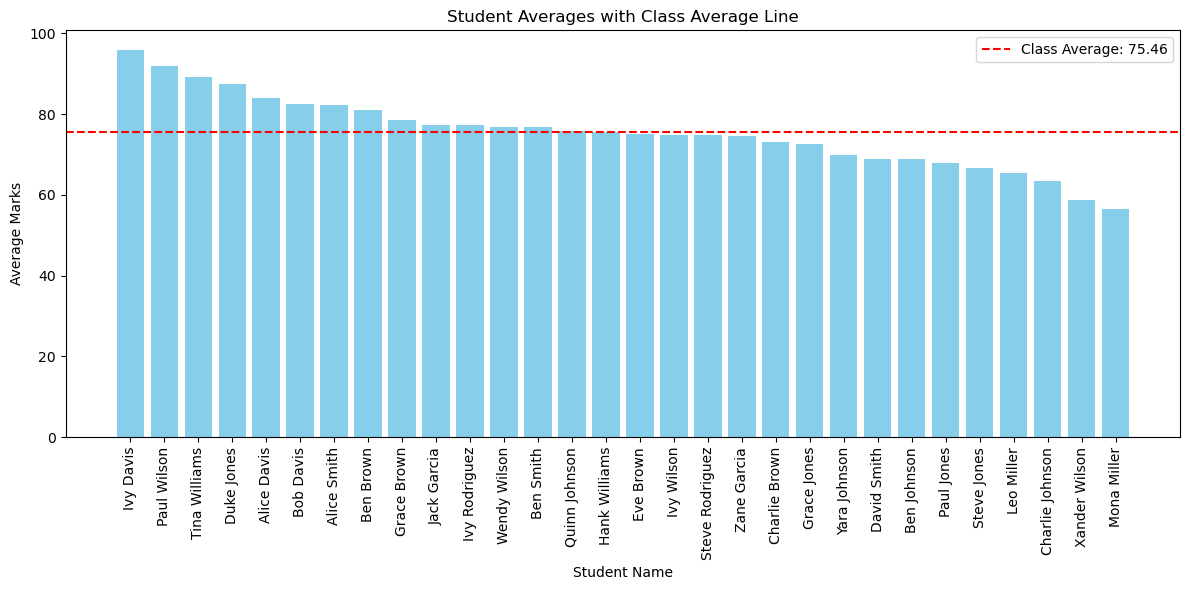

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_student_data.csv")
class_avg = df['average'].mean()

# Sort by average for better visual
df_sorted = df.sort_values(by='average', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted['name'], df_sorted['average'], color='skyblue')
plt.axhline(y=class_avg, color='red', linestyle='--', label=f'Class Average: {class_avg:.2f}')
plt.xticks(rotation=90)
plt.title("Student Averages with Class Average Line")
plt.xlabel("Student Name")
plt.ylabel("Average Marks")
plt.legend()
plt.tight_layout()
plt.savefig("class_average_with_students.png")
plt.show()


 Class Topper & Class Average – Box Plot Visualization

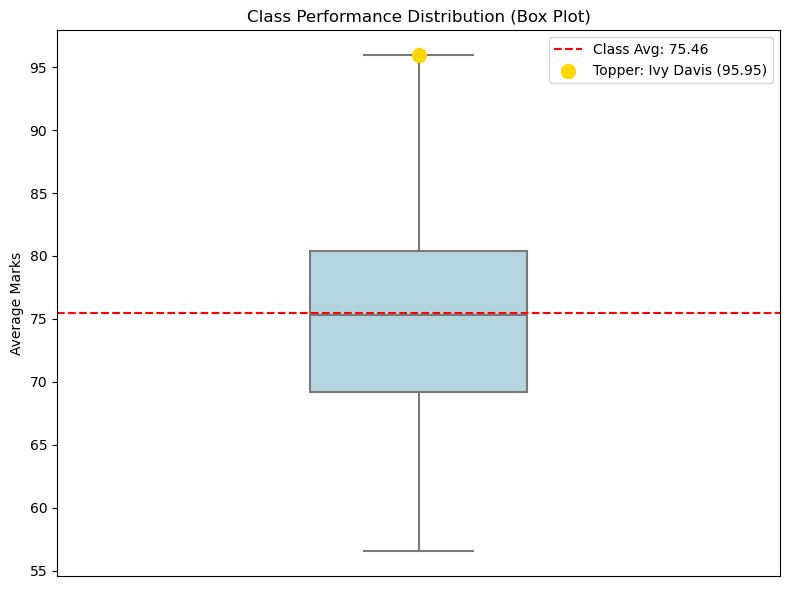

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned student data
df = pd.read_csv("cleaned_student_data.csv")

# Calculate class average and topper info
class_avg = df['average'].mean()
topper = df.loc[df['total'].idxmax()]

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['average'], color='lightblue', width=0.3)

# Add class average line
plt.axhline(class_avg, color='red', linestyle='--', label=f'Class Avg: {class_avg:.2f}')

# Add topper marker
plt.scatter(0, topper['average'], color='gold', s=100, zorder=5, label=f'Topper: {topper["name"]} ({topper["average"]:.2f})')

# Formatting
plt.title("Class Performance Distribution (Box Plot)")
plt.ylabel("Average Marks")
plt.xticks([])  # No x-tick since it's a single box
plt.legend()
plt.tight_layout()
plt.savefig("boxplot_class_topper.png")
plt.show()
